In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
#presumed_residence = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/presumed_res_and_call_loc_without_repetition.csv')
#presumed_residence.sample(15)
df_user_with_residence = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main.csv')
df_user_with_residence = df_user_with_residence.drop('Unnamed: 0', 1)
df_user_with_residence

,USER,ANTENNA_ID,PRESUMED_RESIDENCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
1,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
2,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
3,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
4,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
...,...,...,...
543587,FFFF6761884073022FB5DFE1B6F54DE3,RT,RT
543588,FFFF6761884073022FB5DFE1B6F54DE3,RT,RT
543589,FFFF6761884073022FB5DFE1B6F54DE3,RT,RT
543590,FFFF6761884073022FB5DFE1B6F54DE3,RT,RT


In [3]:
antennas_with_id = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/antenas_with_id.csv', index_col=0)
antennas_with_id.sample(15)

,ID,ANTENNA,CITY,LAT,LONG,ANTENNA_ID
37,45760,50143,São João del-Rei,-21.13589,-44.25834,SJDR5
10,5826,27711,Madre de Deus de Minas,-21.48194,-44.33039,MDM
29,20103,23443,São João del-Rei,-21.10707,-44.21979,SJDR1
45,51822,48581,Madre de Deus de Minas,-21.48194,-44.33039,MDM
7,5181,29942,Tiradentes,-21.11886,-44.16478,TR1
1,4706,23442,São João del-Rei,-21.10707,-44.21979,SJDR1
9,5585,29941,Tiradentes,-21.11886,-44.16478,TR1
30,30226,51372,São Tiago,-20.91224,-44.50842,ST
19,16219,49592,Lagoa Dourada,-20.92802,-44.08333,LD1
22,17129,27451,Madre de Deus de Minas,-21.48194,-44.33039,MDM


In [4]:
antennas_with_id.groupby(['ANTENNA_ID']).min().reset_index()

,ANTENNA_ID,ID,ANTENNA,CITY,LAT,LONG
0,LD1,14448,49592,Lagoa Dourada,-20.92802,-44.08333
1,MDM,4593,27451,Madre de Deus de Minas,-21.48194,-44.33039
2,RT,16547,51601,Ritápolis,-21.02604,-44.32029
3,SJDR1,4706,23441,São João del-Rei,-21.10707,-44.21979
4,SJDR2,4707,23461,São João del-Rei,-21.12699,-44.26144
5,SJDR3,5483,23471,São João del-Rei,-21.08391,-44.23300
6,SJDR4,6666,23451,São João del-Rei,-21.13140,-44.24749
7,SJDR5,14626,50141,São João del-Rei,-21.13589,-44.25834
8,ST,30226,51371,São Tiago,-20.91224,-44.50842
9,SVM,17493,60761,São Vicente de Minas,-21.70206,-44.44245


In [5]:
antennas_and_lat_long = antennas_with_id.groupby('ANTENNA_ID').agg({'LAT': min, 'LONG':min}).reset_index()
antennas_and_lat_long

,ANTENNA_ID,LAT,LONG
0,LD1,-20.92802,-44.08333
1,MDM,-21.48194,-44.33039
2,RT,-21.02604,-44.32029
3,SJDR1,-21.10707,-44.21979
4,SJDR2,-21.12699,-44.26144
5,SJDR3,-21.08391,-44.23300
6,SJDR4,-21.13140,-44.24749
7,SJDR5,-21.13589,-44.25834
8,ST,-20.91224,-44.50842
9,SVM,-21.70206,-44.44245


# Calculando a distância entre as antenas

In [6]:
def dist(x, y):
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(y[0])
    lon2 = radians(y[1])
    
    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return round(distance, 4)

In [7]:
distances = pdist(antennas_and_lat_long[['LAT', 'LONG']].values, metric=dist)

points = antennas_and_lat_long['ANTENNA_ID'].values

result = pd.DataFrame(squareform(distances), columns=points, index=points)

result

,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
LD1,0.0000,66.7267,26.9171,24.4415,28.8400,23.2851,28.3236,29.4062,44.2006,93.7940,22.8496,23.4121
MDM,66.7267,0.0000,50.7205,43.2435,40.1224,45.4089,39.9257,39.2085,66.0024,27.0885,43.8808,43.3709
RT,26.9171,50.7205,0.0000,13.7858,12.7824,11.1147,13.9437,13.8070,23.2815,76.2509,19.1602,17.6587
SJDR1,24.4415,43.2435,13.7858,0.0000,4.8565,2.9181,3.9477,5.1259,36.9841,70.0825,5.8567,4.1621
SJDR2,28.8400,40.1224,12.7824,4.8565,0.0000,5.6277,1.5282,1.0409,35.0451,66.6546,10.0698,8.3804
SJDR3,23.2851,45.4089,11.1147,2.9181,5.6277,0.0000,5.4921,6.3515,34.3890,72.0973,8.0764,6.5441
SJDR4,28.3236,39.9257,13.9437,3.9477,1.5282,5.4921,0.0000,1.2315,36.4444,66.6074,8.6942,7.0370
SJDR5,29.4062,39.2085,13.8070,5.1259,1.0409,6.3515,1.2315,0.0000,35.9583,65.7973,9.8902,8.2480
ST,44.2006,66.0024,23.2815,36.9841,35.0451,34.3890,36.4444,35.9583,0.0000,88.1171,42.4416,40.9318
SVM,93.7940,27.0885,76.2509,70.0825,66.6546,72.0973,66.6074,65.7973,88.1171,0.0000,70.9562,70.4098


In [8]:
melt_df = pd.melt(result.reset_index(), id_vars='index')
melt_df.rename(columns={'index': 'ANTENNA_ID', 'variable': 'PRESUMED_RESIDENCE', 'value': 'DISTANCE'}, inplace=True)

melt_df

,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
0,LD1,LD1,0.0000
1,MDM,LD1,66.7267
2,RT,LD1,26.9171
3,SJDR1,LD1,24.4415
4,SJDR2,LD1,28.8400
...,...,...,...
139,SJDR5,TR2,8.2480
140,ST,TR2,40.9318
141,SVM,TR2,70.4098
142,TR1,TR2,1.7198


In [9]:
df_main = pd.merge(df_user_with_residence, melt_df, left_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'], right_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'])
df_main.sample(10)

,USER,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
314419,8ED11440635714CA7FAF7FF19B8F3891,SVM,SVM,0.0000
524061,AB2861B79C9C14589E7DD6C507207377,SJDR2,SJDR1,4.8565
368604,22856D9B786652CD1880CF3C4607B079,SJDR4,SJDR4,0.0000
353919,06EEBBCCECB6A8F99A33F19FEE486020,SJDR4,SJDR4,0.0000
316021,9393389E36FC4B869A4FB9B1CC7384DF,SVM,SVM,0.0000
108552,C423C76F7C1291661F2DC04B7E106119,SJDR2,SJDR2,0.0000
421727,875B430EA0AF9BB410323EF25C01DCF6,SJDR4,SJDR4,0.0000
417038,7E33E06AA7B53E0D3D171D48E5134ADB,SJDR4,SJDR4,0.0000
507327,6BC5BF2372FCED7F69A6CEB847684FF7,SJDR4,SJDR1,3.9477
53100,204883375231DA0CFE55D3FA1EBBF8BB,LD1,LD1,0.0000


In [10]:
df_final = df_main.groupby(['USER', 'PRESUMED_RESIDENCE']).agg({'ANTENNA_ID': list, 'DISTANCE': sum}).reset_index()
df_final.rename(columns={'ANTENNA_ID':'CALL_LOC', 'DISTANCE': 'TRAVELLED_DISTANCE'}, inplace=True)
df_final.head(3)

,USER,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,"[SJDR5, SJDR5, SJDR5, SJDR5, SJDR5]",0.0
1,000579E8BA1DA9E5292392473BCCCD2A,LD1,"[LD1, LD1, LD1, LD1, LD1, LD1, LD1]",0.0
2,0008962B966EF6C5571DF03F5C786677,SJDR2,"[SJDR2, SJDR2, SJDR2, SJDR2, SJDR2, SJDR2, SJD...",0.0


# Medidas de Posição e Dispersão

In [11]:
#Considerando as ligações na região presumida
df_stats = df_final.groupby(['PRESUMED_RESIDENCE']).mean()
df_stats = df_stats.rename(columns={'TRAVELLED_DISTANCE': 'MEAN'})
df_stats = df_stats.rename_axis('LOCATION')
df_stats

,MEAN
LOCATION,
LD1,5.236195
MDM,3.934221
RT,0.201074
SJDR1,4.895261
SJDR2,5.658781
SJDR3,4.333439
SJDR4,3.287092
SJDR5,3.056248
ST,23.657100


In [12]:
df_stats.mean()

MEAN    6.524416
dtype: float64

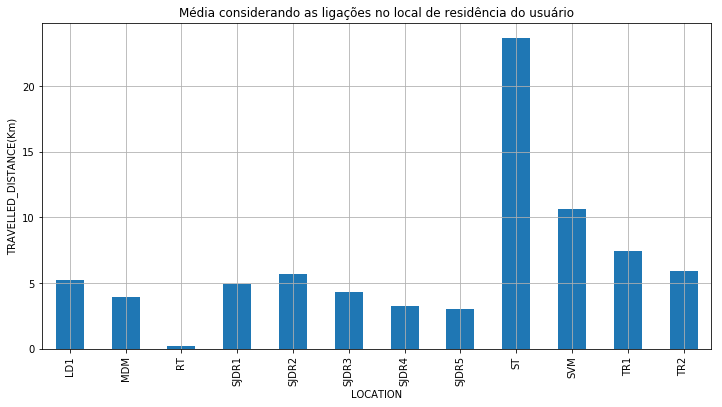

In [13]:
plt.figure(figsize=(12,6))
df_stats['MEAN'].plot(kind='bar')
plt.title('Média considerando as ligações no local de residência do usuário')
plt.ylabel('TRAVELLED_DISTANCE(Km)')
plt.grid()
plt.savefig('Média considerando as ligações no local de residência do usuário.png')

In [14]:
df = df_final.loc[df_final['TRAVELLED_DISTANCE']>0]
df2 = df.groupby(['PRESUMED_RESIDENCE']).mean()
df2 = df2.rename(columns={'TRAVELLED_DISTANCE': 'MEAN'})
df2 = df2.rename_axis('LOCATION')
df2

,MEAN
LOCATION,
LD1,83.418006
MDM,87.290530
RT,49.971624
SJDR1,17.341648
SJDR2,14.704662
SJDR3,22.958562
SJDR4,23.195218
SJDR5,16.028908
ST,100.542675


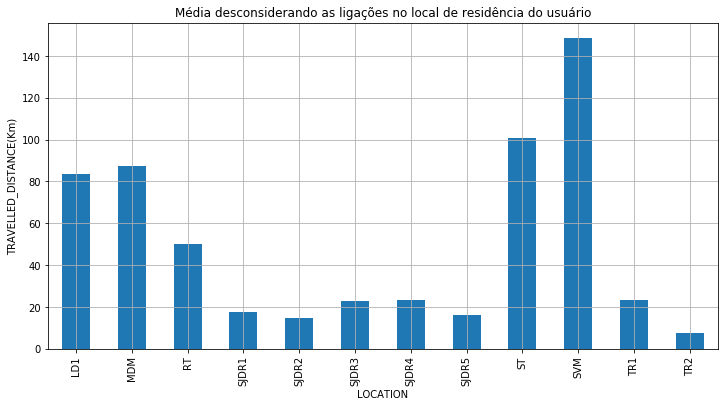

In [15]:
plt.figure(figsize=(12,6))
df2['MEAN'].plot(kind='bar')
plt.title('Média desconsiderando as ligações no local de residência do usuário')
plt.ylabel('TRAVELLED_DISTANCE(Km)')
plt.grid()
plt.savefig('Média desconsiderando as ligações no local de residência do usuário.png')

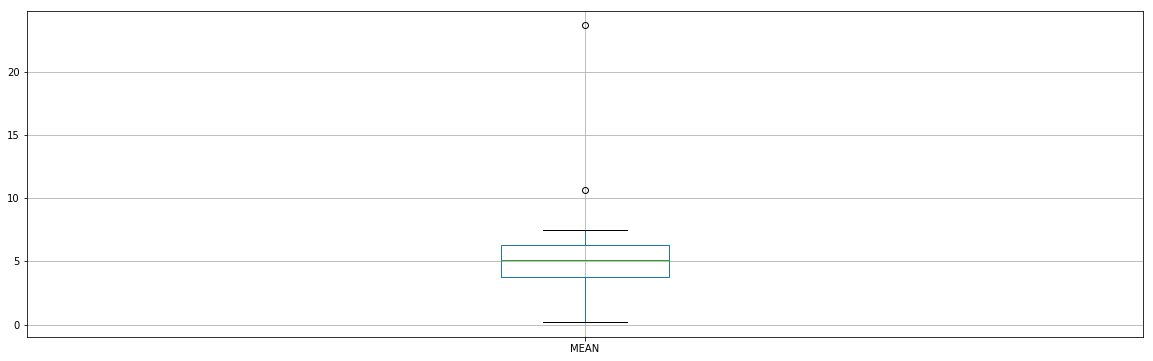

In [16]:
plt.figure(figsize=(20,6))
df_stats['MEAN'].plot(kind='box')
plt.grid()

In [17]:
df = df_final.loc[df_final['TRAVELLED_DISTANCE']>0]
df_stats['DISTANCES'] = df_final.groupby(['PRESUMED_RESIDENCE']).agg({'TRAVELLED_DISTANCE':list})

In [22]:
df_without_0 = df_final.loc[df_final['TRAVELLED_DISTANCE']>0]
df_with_0 = df_final

df_median_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_without_0 = df_median_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEDIAN'})

df_median_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_with_0 = df_median_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEDIAN'})

df_mean_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_without_0 = df_mean_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEAN'})

df_mean_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_with_0 = df_mean_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEAN'})

df_mean_with_0

,LOWER_MEAN
PRESUMED_RESIDENCE,
LD1,5.236195
MDM,3.934221
RT,0.201074
SJDR1,4.895261
SJDR2,5.658781
SJDR3,4.333439
SJDR4,3.287092
SJDR5,3.056248
ST,23.657100


In [28]:
from functools import reduce

dfs = [df_mean_with_0, df_mean_without_0, df_median_with_0, df_median_without_0]

result_1 = pd.concat(dfs, join='outer', axis=1)
result_1

,LOWER_MEAN,HIGHER_MEAN,LOWER_MEDIAN,HIGHER_MEDIAN
PRESUMED_RESIDENCE,,,,
LD1,5.236195,83.418006,0.0000,56.6472
MDM,3.934221,87.290530,0.0000,50.7205
RT,0.201074,49.971624,0.0000,38.3204
SJDR1,4.895261,17.341648,0.0000,7.8954
SJDR2,5.658781,14.704662,0.0000,5.8974
SJDR3,4.333439,22.958562,0.0000,8.4102
SJDR4,3.287092,23.195218,0.0000,5.4921
SJDR5,3.056248,16.028908,0.0000,5.1259
ST,23.657100,100.542675,0.0000,94.9891
